In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from glob import glob
import xml.etree.ElementTree as ET

In [256]:
DATA_PATH = "./dataset/BBRegression"

In [257]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob(path + '/*.xml'):

        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = member.find('name').text

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [258]:
import os

FILE_NAME = 'label_cats.csv'

csv_path = os.path.join(DATA_PATH, 'train')
df = xml_to_csv(csv_path)
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,cat-100_jpg.rf.a5aa9bdcb2398789606b37b4a051f58...,224,224,cat,28,10,216,124
1,cat-102_jpg.rf.2420d046ebfd7b7276b7e6e05f4348c...,224,224,cat,17,10,197,182
2,cat-103_jpg.rf.725bf5b045d3a60b602305f53f617fd...,224,224,cat,67,21,178,155
3,cat-104_jpg.rf.2a24b28217199b0deb97f08d04a4554...,224,224,cat,24,32,218,163
4,cat-105_jpg.rf.c2a86a1bbbd2692274d6d6084512e92...,224,224,cat,110,1,225,113
...,...,...,...,...,...,...,...,...
86,cat-280_jpg.rf.7f896ee30db7572742bb1d9d4faa8e5...,224,224,cat,6,10,66,79
87,cat-282_jpg.rf.4dbd885f2e7c663328cc4633830d297...,224,224,cat,89,3,211,138
88,cat-283_jpg.rf.c4764b12c8af961b92aaf7676f08226...,224,224,cat,8,9,69,141
89,cat-28_jpg.rf.27a874e0fa79267b8311563cde71394a...,224,224,cat,59,28,215,178


In [259]:
images = df['filename'].values  # to numpy array
images[:5]

array(['cat-100_jpg.rf.a5aa9bdcb2398789606b37b4a051f58c.jpg',
       'cat-102_jpg.rf.2420d046ebfd7b7276b7e6e05f4348cb.jpg',
       'cat-103_jpg.rf.725bf5b045d3a60b602305f53f617fdf.jpg',
       'cat-104_jpg.rf.2a24b28217199b0deb97f08d04a4554d.jpg',
       'cat-105_jpg.rf.c2a86a1bbbd2692274d6d6084512e920.jpg'],
      dtype=object)

In [260]:
points = df.iloc[:, 4:].values
points[:5]

array([[ 28,  10, 216, 124],
       [ 17,  10, 197, 182],
       [ 67,  21, 178, 155],
       [ 24,  32, 218, 163],
       [110,   1, 225, 113]], dtype=int64)

In [261]:
import PIL

dataset_images = []
dataset_bbs = []

for file, point in zip(images, points):
    f = os.path.join(DATA_PATH, 'train', file)
    image = PIL.Image.open(f)
    arr = np.array(image)
    dataset_images.append(arr)
    dataset_bbs.append(point)

In [262]:
print(type(dataset_bbs))
dataset_bbs     # numpy array가 속도가 빠른 이유는 한번 생성하면 변경 할 수 없고, 데이터 형식이 모두 동일하기 때문
                # 내부는 numpy array지만, 바깥은 list type이라 다루기가 힘든 데이터
                # 따라서 작업이 끝난 뒤 numpy array type으로 변경하는것이 좋음

<class 'list'>


[array([ 28,  10, 216, 124], dtype=int64),
 array([ 17,  10, 197, 182], dtype=int64),
 array([ 67,  21, 178, 155], dtype=int64),
 array([ 24,  32, 218, 163], dtype=int64),
 array([110,   1, 225, 113], dtype=int64),
 array([ 12,  11, 130, 147], dtype=int64),
 array([ 90,   5, 195, 168], dtype=int64),
 array([ 30,  19, 215, 193], dtype=int64),
 array([ 35,  37, 173, 152], dtype=int64),
 array([ 28,  18, 126, 103], dtype=int64),
 array([ 82,  17, 150,  95], dtype=int64),
 array([  5,  21, 113, 152], dtype=int64),
 array([ 67,  38, 198, 205], dtype=int64),
 array([ 41,  35, 149, 173], dtype=int64),
 array([ 92,   4, 202, 110], dtype=int64),
 array([ 33,   7, 148,  71], dtype=int64),
 array([ 84,   3, 209, 102], dtype=int64),
 array([ 32,  34, 122, 129], dtype=int64),
 array([ 59,  54, 187, 213], dtype=int64),
 array([ 85,  10, 194, 145], dtype=int64),
 array([ 73,   2, 152, 102], dtype=int64),
 array([ 58,  19, 132, 111], dtype=int64),
 array([ 70,  14, 181, 105], dtype=int64),
 array([ 53

In [263]:
dataset_bbs = np.array(dataset_bbs)
print(type(dataset_bbs))
dataset_bbs.shape

<class 'numpy.ndarray'>


(91, 4)

In [264]:
dataset_images = np.array(dataset_images)
print(type(dataset_images))
dataset_images.shape

<class 'numpy.ndarray'>


(91, 224, 224, 3)

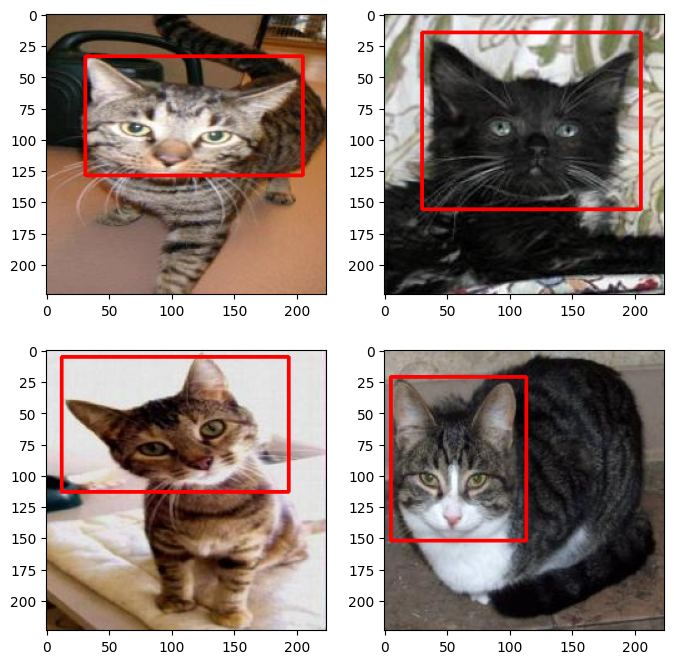

In [265]:
import cv2

samples = np.random.randint(91, size=4)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    points = dataset_bbs[idx].reshape(2, 2)
    img = cv2.rectangle(dataset_images[idx].copy(),
                        tuple(points[0]),
                        tuple(points[1]),
                        color=(255, 0, 0),
                        thickness=2)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
plt.show()

In [266]:
# 중간처리 이미지 데이터 저장

np.savez('cat_bbs.npz', images = dataset_images, bbs = dataset_bbs)

In [267]:
# npz 파일 읽기

dataset = np.load('cat_bbs.npz')
dataset_images = dataset['images']
dataset_bbs = dataset['bbs']

X = dataset_images
y = dataset_bbs

print(X.shape, y.shape)

# (91, 224, 224, 3) (91, 4)
# (이미지 수, 높이, 넓이, 채널) (이미지 수, 사각형 점 4개)

(91, 224, 224, 3) (91, 4)


In [268]:
y[0]

array([ 28,  10, 216, 124], dtype=int64)

In [269]:
X_train = X.copy()
y_train = y.copy()

X_train_s = X_train.astype('float32')/255.
print(np.max(X_train_s), np.min(X_train_s))

1.0 0.0


### Model

- 91개로 이미지 특징을 뽑아 훈련시키기는 너무 적음
- 전이학습 사용
- cnn모델은 그대로 사용, 분류 layer만 갈아끼움

In [270]:
from keras.applications import MobileNetV2

base = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base.trainable = False

In [271]:
base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [272]:
from keras import layers

model = keras.Sequential([
    base,                       # 여기는 학습이 안됨, 이미지 특징추출만 함
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(4)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_8 (Flatten)         (None, 62720)             0         
                                                                 
 dense_23 (Dense)            (None, 256)               16056576  
                                                                 
 dense_24 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 18,315,588
Trainable params: 16,057,604
Non-trainable params: 2,257,984
_________________________________________________________________


In [273]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)

In [274]:
from keras.callbacks import ModelCheckpoint

ckpt_path = './ckpt/cats_bbs.ckpt'
ckpt_cb = ModelCheckpoint(
    ckpt_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss'
)

In [275]:
EPOCHS = 30
BATCH_SIZE = 16

history = model.fit(
    X_train_s, y_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_split=0.2,
    callbacks = [ckpt_cb],
    verbose = 1
)

Epoch 1/30
5/5 [==============================] - 3s 281ms/step - loss: 5384.9570 - mse: 5384.9570 - val_loss: 2842.1816 - val_mse: 2842.1816
Epoch 2/30
5/5 [==============================] - 1s 167ms/step - loss: 1897.9213 - mse: 1897.9213 - val_loss: 1042.6085 - val_mse: 1042.6085
Epoch 3/30
5/5 [==============================] - 0s 32ms/step - loss: 808.0836 - mse: 808.0836 - val_loss: 1850.0006 - val_mse: 1850.0006
Epoch 4/30
5/5 [==============================] - 1s 162ms/step - loss: 959.4929 - mse: 959.4929 - val_loss: 897.6649 - val_mse: 897.6649
Epoch 5/30
5/5 [==============================] - 1s 169ms/step - loss: 379.0105 - mse: 379.0105 - val_loss: 716.5397 - val_mse: 716.5397
Epoch 6/30
5/5 [==============================] - 0s 35ms/step - loss: 265.9699 - mse: 265.9699 - val_loss: 1113.7930 - val_mse: 1113.7930
Epoch 7/30
5/5 [==============================] - 0s 34ms/step - loss: 199.0161 - mse: 199.0161 - val_loss: 911.5029 - val_mse: 911.5029
Epoch 8/30
5/5 [=========

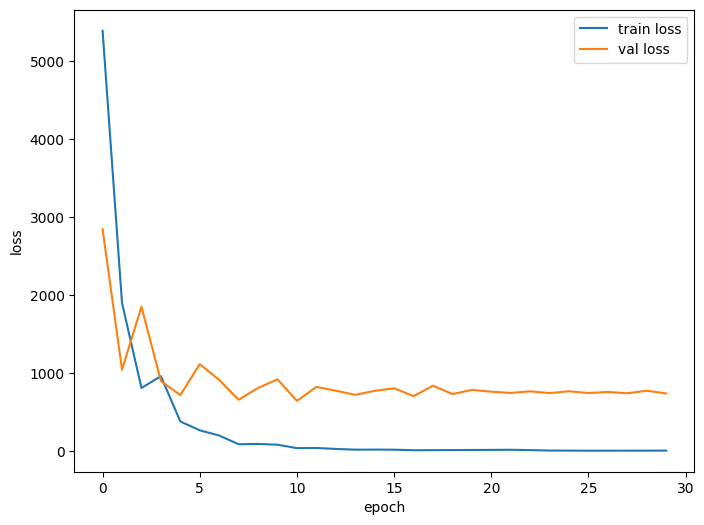

In [276]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (8,6))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.show()

plot_history(history)

In [277]:
# get best model
model.load_weights(ckpt_path)


### Test

In [278]:
fnames = glob('./dataset/BBRegression/test' + '/*.jpg')
X_test = []
for f in fnames:
    image = PIL.Image.open(f)
    arr = np.array(image)
    X_test.append(arr)
    
X_test = np.array(X_test)
X_test_s = X_test.astype('float32')/255.
y_pred = model.predict(X_test_s).astype('int')

1/1 [==============================] - 0s 426ms/step


In [279]:
y_pred

array([[ 71,   6, 181, 105],
       [ 60,   9, 151, 102],
       [ 54,  19, 188, 156],
       [ 61,  25, 194, 167],
       [ 39,   7, 162, 109],
       [ 50,   4, 138,  81],
       [ 54,  13, 168, 147],
       [ 39,  13, 150, 146],
       [ 34,  15, 158, 151],
       [ 39,  11, 168, 120],
       [ 48,  20, 175, 159]])

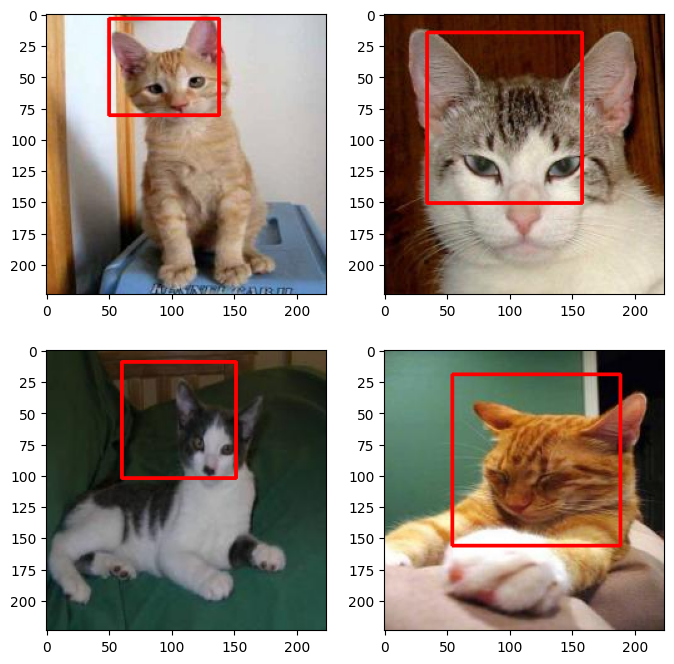

In [280]:
samples = np.random.randint(11, size=4)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    points = y_pred[idx].reshape(2, 2)
    img = cv2.rectangle(X_test[idx].copy(), tuple(points[0]),tuple(points[1]),color=(255, 0, 0),
                        thickness=2)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
plt.show()